<a href="https://colab.research.google.com/github/ImHarshhh/Indian_House_Prediction/blob/main/House__Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load the dataset
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.describe

<bound method NDFrame.describe of                  area_type   availability                  location  \
0      Super built-up Area         19-Dec  Electronic City Phase II   
1                Plot Area  Ready To Move          Chikka Tirupathi   
2            Built-up Area  Ready To Move               Uttarahalli   
3      Super built-up Area  Ready To Move        Lingadheeranahalli   
4      Super built-up Area  Ready To Move                  Kothanur   
...                    ...            ...                       ...   
13315        Built-up Area  Ready To Move                Whitefield   
13316  Super built-up Area  Ready To Move             Richards Town   
13317        Built-up Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up Area         18-Jun           Padmanabhanagar   
13319  Super built-up Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Bedroom  Theanmp       2600   5.0      3.0  120.00  
2          3 BHK      NaN       1440   2.0      3.0   62.00  
3          3 BHK  Soiewre       1521   3.0      1.0   95.00  
4          2 BHK      NaN       1200   2.0      1.0   51.00  
...          ...      ...        ...   ...      ...     ...  
13315  5 Bedroom  ArsiaEx       3453   4.0      0.0  231.00  
13316      4 BHK      NaN       3600   5.0      NaN  400.00  
13317      2 BHK  Mahla T       1141   2.0      1.0   60.00  
13318      4 BHK  SollyCl       4689   4.0      1.0  488.00  
13319      1 BHK      NaN        550   1.0      1.0   17.00  

[13320 rows x 9 columns]>

In [11]:
location_count = data.groupby('location').size().sort_values(ascending=False)
location_count


location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Length: 1305, dtype: int64

<Axes: xlabel='location'>

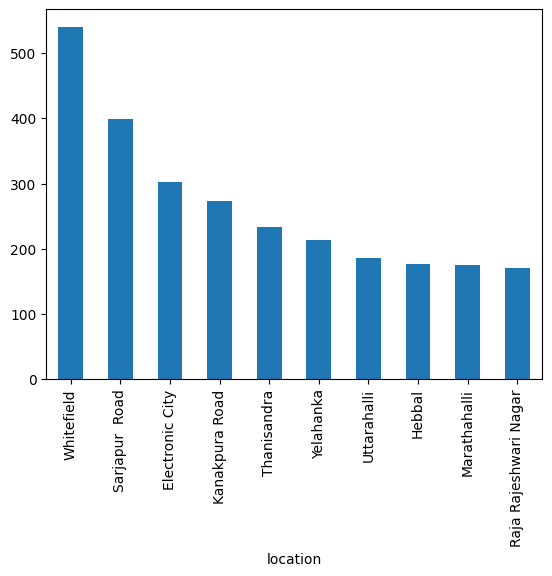

In [26]:
# Top places in Bengaluru

location_count[:10].plot(kind="bar")

In [27]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [28]:
#Data clean: handle null values
data = data.dropna()

In [29]:
data.area_type.unique()

array(['Super built-up Area', 'Plot Area', 'Built-up Area', 'Carpet Area'],
      dtype=object)

In [30]:
#drop availability because it's not required
data = data.drop('availability',axis=1)

In [31]:
len(data.location.unique())

634

In [32]:
location_count = data.groupby('location').size().sort_values(ascending=False)
location_count

location
Whitefield                        397
Sarjapur  Road                    310
Electronic City                   236
Kanakpura Road                    216
Thanisandra                       212
                                 ... 
Kalhalli                            1
 Bhoganhalli                        1
KSRTC Layout                        1
KR Garden                           1
Yeshwanthpur Industrial Suburb      1
Length: 634, dtype: int64

In [33]:
len(location_count[location_count<=10])

491

In [34]:
location_less_10 = location_count[location_count<=10]

In [35]:
#if the location have less than 10 or 10 houses than that location are known as other location
data.location = data.location.apply(lambda x: 'other' if x in location_less_10 else x)

In [36]:
len(data.location.unique())

144

In [37]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data.bhk.unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7])

In [38]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [39]:
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num)
data = data[data.total_sqft.notnull()]
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4


In [40]:
#drop society column because it's not required
data = data.drop('society',axis=1)

In [41]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4


In [42]:
#create new column price_sqft that contain price per sqft
data['price_sqft'] = data.price*100000/data.total_sqft

In [43]:
#remove outlier using standard deviation
upper_limit = data.price_sqft.mean() + data.price_sqft.std()
lower_limit = data.price_sqft.mean() - data.price_sqft.std()
data = data[data.price_sqft<upper_limit]
data = data[data.price_sqft > lower_limit]

In [44]:
#remove 2BHK house that price per sqft is less than the mean of 1bhk house price
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)

In [45]:
data = data.drop('price_sqft',axis=1)

In [46]:
#apply one hot encoding in location column
dummies = pd.get_dummies(data.location)
location_cat = pd.get_dummies(data.location)
dummies.head()


,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
12,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
data = pd.concat([data,dummies.drop('1st Phase JP Nagar',axis='columns')],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,False,False,...,False,False,False,False,False,False,False,False,False,False
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,False,False,...,False,False,False,False,False,True,False,False,False,False
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,False,True,...,False,False,False,False,False,False,False,False,False,False


In [48]:
#apply one hot encoding in area column
dummies = pd.get_dummies(data.area_type)
dummies.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,False,False,False,True
1,False,False,True,False
3,False,False,False,True
11,False,False,True,False
12,False,False,False,True


In [49]:
data = pd.concat([data,dummies],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,False,False,...,False,False,False,False,False,False,False,False,True,False
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,False,False,...,False,False,False,False,False,False,False,False,False,True
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,False,False,...,False,True,False,False,False,False,False,False,True,False
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,False,True,...,False,False,False,False,False,False,False,False,False,True


In [50]:
data = data.drop(['location','size','area_type'] , axis=1)

In [51]:
data.head()

,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,1056.0,2.0,1.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2600.0,5.0,3.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1521.0,3.0,1.0,95.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11,2785.0,5.0,3.0,295.00,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
12,1000.0,2.0,1.0,38.00,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [53]:
data.corr()

,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
total_sqft,1.000000,0.791966,0.288629,0.916476,0.753445,-0.023955,-0.010558,-0.037594,-0.009234,-0.019400,...,-0.007652,0.136794,-0.010964,-0.046218,-0.031574,0.108945,-0.006760,-0.042263,0.318507,-0.144813
bath,0.791966,1.000000,0.325683,0.712590,0.854523,-0.026161,-0.008083,-0.030972,-0.017946,-0.016560,...,-0.022577,0.086595,-0.003614,-0.050565,-0.034905,0.072857,-0.031207,-0.015300,0.285860,-0.112255
balcony,0.288629,0.325683,1.000000,0.235817,0.350949,0.004460,-0.008397,-0.030248,-0.020689,0.005544,...,-0.044997,0.017960,0.013466,-0.000241,-0.009505,0.097368,-0.015189,-0.032328,0.059178,-0.009342
price,0.916476,0.712590,0.235817,1.000000,0.661730,-0.025950,-0.000239,-0.031872,-0.020918,-0.021429,...,-0.024085,0.136843,-0.018566,-0.038045,-0.013489,0.146742,-0.008342,-0.025273,0.353286,-0.164394
bhk,0.753445,0.854523,0.350949,0.661730,1.000000,-0.023043,0.011576,-0.034421,-0.018395,-0.020720,...,-0.028466,0.073568,-0.008872,-0.053719,-0.046549,0.096786,-0.002923,-0.013922,0.295575,-0.142673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
other,0.108945,0.072857,0.097368,0.146742,0.096786,-0.021526,-0.051590,-0.025485,-0.023588,-0.017568,...,-0.028371,-0.084704,-0.052508,-0.024869,-0.032945,1.000000,0.087831,0.006663,0.059278,-0.109551
Built-up Area,-0.006760,-0.031207,-0.015189,-0.008342,-0.002923,0.038690,0.002730,-0.017604,0.022039,-0.018042,...,-0.029136,-0.041395,-0.003368,0.027138,-0.033834,0.087831,1.000000,-0.034317,-0.085138,-0.843160
Carpet Area,-0.042263,-0.015300,-0.032328,-0.025273,-0.013922,-0.004457,-0.010682,0.031292,-0.004884,-0.003638,...,-0.005874,-0.017539,-0.010872,-0.005149,-0.006822,0.006663,-0.034317,1.000000,-0.017166,-0.170001
Plot Area,0.318507,0.285860,0.059178,0.353286,0.295575,-0.011058,-0.026502,0.002170,-0.012117,-0.009025,...,-0.014574,0.114124,-0.011966,0.002862,-0.016924,0.059278,-0.085138,-0.017166,1.000000,-0.421759


In [56]:
#split data into dependent feature & independent feature
X = data.drop('price',axis=1)

In [57]:
y=data['price']

In [58]:
#split data into train-test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
regressor = cross_val_score(LinearRegression(), X, y, cv=cv)
regressor

array([0.90264951, 0.89014555, 0.86736688, 0.89276874, 0.87845573])

In [59]:
np.average(regressor)

0.8862772833440149

In [60]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [61]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [62]:
y_pred = model.predict(x_test)

In [63]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

18.436760127655443
890.5873858242887
29.842710765349196


In [71]:
models= {"Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor()}

#Create a function to fit and score models

def fit_and_score(model,X_train,X_test,Y_train,Y_test):
    np.random.seed(42)
    model_score={}

    #Loop through model
    for name,model in models.items():
        model.fit(X_train,Y_train)
        # Evaluate the model
        model_score[name]=model.score(X_test,Y_test)
    return model_score


In [72]:
model_scores=fit_and_score(model=models,X_train=x_train,X_test=x_test,Y_train=y_train,Y_test=y_test)

model_scores

{'Linear Regression': 0.8757211365980582,
 'Decision Tree': 0.846881201424611,
 'Random Forest': 0.8909523752824059}

<Axes: >

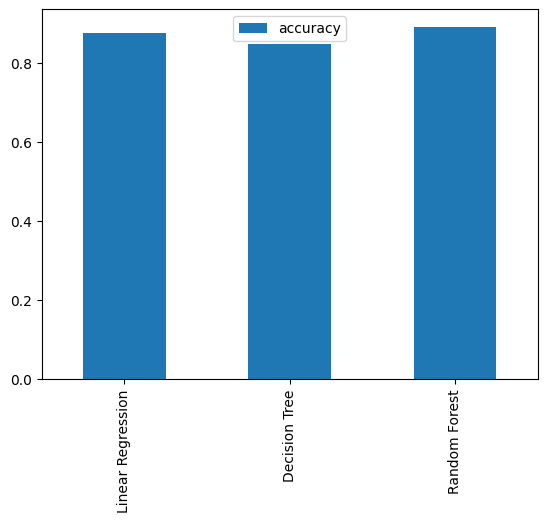

In [73]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

In [80]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_tuning(model, param_grid, X_train, y_train):

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
  grid_search.fit(X_train, y_train)

  return grid_search.best_estimator_

In [81]:
param_grid_linear = {}

In [82]:
param_grid_tree = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [83]:
param_grid_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

In [84]:
best_linear = hyperparameter_tuning(LinearRegression(), param_grid_linear, x_train, y_train)
best_tree = hyperparameter_tuning(DecisionTreeRegressor(), param_grid_tree, x_train, y_train)
best_forest = hyperparameter_tuning(RandomForestRegressor(), param_grid_forest, x_train, y_train)

In [85]:
print("Best Linear Regression Parameters:", best_linear)
print("Best Decision Tree Parameters:", best_tree)
print("Best Random Forest Parameters:", best_forest)

Best Linear Regression Parameters: LinearRegression()
Best Decision Tree Parameters: DecisionTreeRegressor(max_depth=10, min_samples_split=10)
Best Random Forest Parameters: RandomForestRegressor(n_estimators=300)


In [86]:
new_models= {"Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(max_depth=10, min_samples_split=10),
        "Random Forest": RandomForestRegressor(n_estimators=300)}

In [87]:
new_model_scores=fit_and_score(model=new_models,X_train=x_train,X_test=x_test,Y_train=y_train,Y_test=y_test)

new_model_scores

{'Linear Regression': 0.8757211365980582,
 'Decision Tree': 0.846881201424611,
 'Random Forest': 0.8909523752824059}

In [88]:
#save the model
import pickle
with open('model.pkl', 'wb') as fh:
   pickle.dump(model, fh)

In [89]:
cat = data.drop(['price'] , axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)

In [90]:
#save the column name
location_list = list(zip(location_cat.columns,range(cat.shape[1])))

In [91]:
with open('location_cat', 'wb') as fid:
    pickle.dump(location_list, fid,2)

In [92]:
def predict(location,area,size,bath,balcony,total_sqft):
    output = np.zeros(151)
    output[0] = total_sqft
    output[1] = bath
    output[2] = balcony
    output[3] = size

    result_location = location
    if result_location not in location_cat:
        output[146] = 1
    else:
        output[index_dict[str(location)]] = 1

    return model.predict([output])[0]

In [93]:
#(location , area_type , size , bath , balcony , total_sqft)
predict('Yelahanka','Carpet Area', 3, 3, 2 ,3000)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


264.5056412573775

In [94]:
predict('Yeshwanthpur' , 'Carpet Area' , 3 , 3 , 2 ,3560)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


340.1529015278222

In [95]:
predict('Yelahanka New Town' , 'Carpet Area' , 3 , 4 , 2 ,4000)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


380.08310275941756

In [96]:
predict('Yeshwanthpur' , 'Carpet Area' , 3 , 3 , 3 ,2550)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


229.31511949416063

In [97]:
predict('rajkot' , 'Carpet Area' , 3 , 3 , 3 ,2550)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


228.44712203230426